In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import math
import gc
import pprint
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# LGBM

##### 참고 : https://injo.tistory.com/48?category=1068433

GMB(Gradient Boosting Machine) 이란? 틀린부분에 가중치를 더하면서 진행하는 알고리즘

Gradient Boosting 프레임워크로 Tree기반 학습 알고리즘 
기존의 다른 Tree기반 알고리즘과 다른점은 Tree구조가 수평적으로 확장하는 다른 Tree기반 알고리즘에 비해 수직적으로 확장을 하는것에 있습니다.  

즉, Light GBM은 leaf-wise인 반면 다른 알고리즘은 level-wise입니다. 

- 단점
    Light GBM은 Leaf-wise growth로 과적합의 우려가 다른 Tree 알고리즘 대비 높은 편입니다. 
    그러므로 데이터의 양이 적을 경우 Overfitting(과적합)에 취약한 면이 있어 데이타 양이 적을 경우 사용을 자제하는것이 좋습니다.

In [2]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [3]:
train=train.drop('inst_id',axis=1)
test=test.drop('inst_id',axis=1)

print(train.head(5))
print(test.head(5))

   OC  sido_choongchung  sido_gangwon  sido_gyeongin  sido_gyeongsang  \
0   1               1.0           0.0            0.0              0.0   
1   1               0.0           0.0            0.0              1.0   
2   1               0.0           0.0            1.0              0.0   
3   1               0.0           0.0            1.0              0.0   
4   1               0.0           0.0            0.0              1.0   

   sido_jeonra  sido_seoul  instkind_clinic  instkind_general_hospital  \
0          0.0         0.0              0.0                        0.0   
1          0.0         0.0              0.0                        1.0   
2          0.0         0.0              0.0                        0.0   
3          0.0         0.0              0.0                        1.0   
4          0.0         0.0              0.0                        1.0   

   instkind_hospital  instkind_nursing_hospital  instkind_traditional_clinic  \
0                0.0                

In [4]:
X_train = train.drop('OC', axis=1)
y_train = train['OC']

In [6]:
pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 8.1 MB/s eta 0:00:00



In [7]:
from lightgbm import LGBMClassifier

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings

In [11]:
# 전체 데이터셋을 학습용 80%, 테스트용 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=156)

# 트리개수 400개 지정
lgbm_wrapper = LGBMClassifier(n_estimators=400)

In [12]:
evals = [(X_test, y_test)]

lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds =100, eval_metric='logloss', eval_set=evals, verbose=True)

preds=lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.27791
[2]	valid_0's binary_logloss: 0.257322
[3]	valid_0's binary_logloss: 0.264529
[4]	valid_0's binary_logloss: 0.265485
[5]	valid_0's binary_logloss: 0.26219
[6]	valid_0's binary_logloss: 0.26181
[7]	valid_0's binary_logloss: 0.267166
[8]	valid_0's binary_logloss: 0.268164
[9]	valid_0's binary_logloss: 0.272708
[10]	valid_0's binary_logloss: 0.262514
[11]	valid_0's binary_logloss: 0.268054
[12]	valid_0's binary_logloss: 0.275082
[13]	valid_0's binary_logloss: 0.274653
[14]	valid_0's binary_logloss: 0.281498
[15]	valid_0's binary_logloss: 0.281672
[16]	valid_0's binary_logloss: 0.287888
[17]	valid_0's binary_logloss: 0.289957
[18]	valid_0's binary_logloss: 0.289887
[19]	valid_0's binary_logloss: 0.283581
[20]	valid_0's binary_logloss: 0.28983
[21]	valid_0's binary_logloss: 0.282385
[22]	valid_0's binary_logloss: 0.284126
[23]	valid_0's binary_logloss: 0.290928
[24]	valid_0's binary_logloss: 0.287625
[25]	valid_0's binary_logloss: 0.290281
[26]	valid_0'

In [24]:
def get_clf_eval(y_test, y_pred):
    
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))

In [25]:
get_clf_eval(y_test, preds)

오차행렬:
 [[ 0  1]
 [ 0 19]]

정확도: 0.9500
정밀도: 0.9500
재현율: 1.0000
F1: 0.9744


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

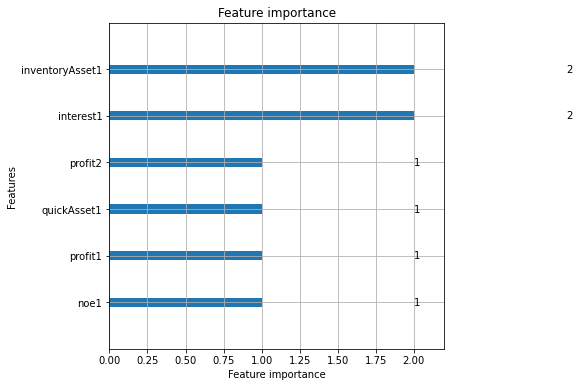

In [17]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 6))
plot_importance(lgbm_wrapper, ax=ax)

### 위의 과정이 정확도가 너무 낮아 분할에서 변경해줌

### 혹은 과적합이 문제인 것 같아 max_depth 값을 줄이라는 것

In [19]:
# 전체 데이터셋을 학습용 80%, 테스트용 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=156)

# 트리개수 400개 지정
lgbm_wrapper = LGBMClassifier(n_estimators=200) # 과적합이 의심되어 절반으로 줄여서 시도

In [20]:
evals = [(X_test, y_test)]

lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds =100, eval_metric='logloss', eval_set=evals, verbose=True)

preds=lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.194477
[2]	valid_0's binary_logloss: 0.1973
[3]	valid_0's binary_logloss: 0.191335
[4]	valid_0's binary_logloss: 0.185313
[5]	valid_0's binary_logloss: 0.183207
[6]	valid_0's binary_logloss: 0.178773
[7]	valid_0's binary_logloss: 0.180428
[8]	valid_0's binary_logloss: 0.1773
[9]	valid_0's binary_logloss: 0.177579
[10]	valid_0's binary_logloss: 0.174147
[11]	valid_0's binary_logloss: 0.17598
[12]	valid_0's binary_logloss: 0.175424
[13]	valid_0's binary_logloss: 0.16385
[14]	valid_0's binary_logloss: 0.164868
[15]	valid_0's binary_logloss: 0.162647
[16]	valid_0's binary_logloss: 0.155683
[17]	valid_0's binary_logloss: 0.148988
[18]	valid_0's binary_logloss: 0.140926
[19]	valid_0's binary_logloss: 0.135824
[20]	valid_0's binary_logloss: 0.13752
[21]	valid_0's binary_logloss: 0.137634
[22]	valid_0's binary_logloss: 0.133729
[23]	valid_0's binary_logloss: 0.127661
[24]	valid_0's binary_logloss: 0.127507
[25]	valid_0's binary_logloss: 0.129599
[26]	valid_0's b

In [22]:
get_clf_eval(y_test, preds) # 아까보다 정확도가 조금 더 올라감

오차행렬:
 [[ 0  1]
 [ 0 19]]

정확도: 0.9500
정밀도: 0.9500
재현율: 1.0000
F1: 0.9744
AUC: 0.5000


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

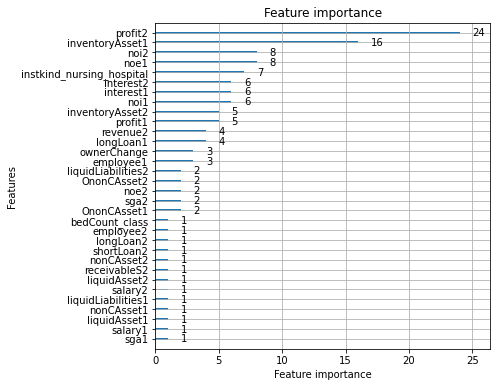

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_importance(lgbm_wrapper, ax=ax)